## PCA

PCA (Principal Component Analysis) is a classical unsupervised learning algorithm. PCA transforms a set of data represented by linearly related variables into a few data represented by linearly independent variables through orthogonal transformation, and these linearly independent variables are principal components. PCA is essentially a data dimensionality reduction method that transforms the high-dimensional data into low-dimensional data, and it can also be used to explore the internal structure of data.

The basic idea of PCA is as follows: First, standardize the original data to be a data set with a mean of 0 and a variance of 1. Then the standardized data is orthogonally transformed that the new data is represented by several linearly independent vectors. The data represented by these new vectors is not only required to be linearly independent of each other, but also needs to contain the largest amount of information of the original data set.

PCA uses variance to measure how important the new variable is. The one with largest variance is the first principal component, the one with second largest variance is the second principal component, and so on. The following is a derivation of the PCA principle.

Suppose the original data are m-dimensional random variables:
$$
x=(x_{1}, x_{2}, \cdots, x_{m})^{\top}
$$

The mean vector is:
$$
u=E(x)=(u_{1}, u_{2}, \cdots, u_{m})^{\top}
$$

The covariance matrix is:
$$
\Sigma=\operatorname{cov}(\boldsymbol{x}, \boldsymbol{x})=E\left[(\boldsymbol{x}-\boldsymbol{u})(\boldsymbol{x}-\boldsymbol{u})^{T}\right]
$$

Assuming that data $x$ is linearly transform into m-dimensional data:
$$
\begin{aligned}
&y=(y_{1}, y_{2}, \cdots, y_{m})^{\top} \\
&y_{i} = \alpha^{\top}_{i}x = \alpha_{1i}x_{1}+ \alpha_{2i}x_{2}+ \cdots+ \alpha_{mi}x_{m} \\
&\alpha^{\top}_{i} = (\alpha_{1i}, \alpha_{2i}, \cdots, \alpha_{mi})
\end{aligned}
$$

Then the statistical features of transformed variable $y_{i}$ is obtained:
$$
\begin{aligned}
&E(y_{i}) = \alpha^{\top}_{i}u_{i}, \enspace i = 1, 2, \cdots, m \\
&var(y_{i}) = \alpha^{\top}_{i} \Sigma \alpha _{i}, \enspace i = 1, 2, \cdots, m \\
&cov(y_{i}, y_{j})= \alpha^{\top}_{i} \Sigma \alpha _{j}, \enspace i,j = 1, 2, \cdots, m
\end{aligned}
$$

When the above linear transformation satisfies the following conditions, the transformed $y_{1}, y_{2}, \cdots, y_{m}$ will be the first principal component, the second principal component, and the $m$-th principal component:

(1) The transformed coefficient vector $\alpha^{\top}_{i}$ is an unit vector, $\alpha^{\top}_{i}\alpha _{i} = 1, \enspace i = 1, 2, \cdots, m$

(2) The transformed variable $y_{i}$ and $y_{j}$ are linearly independent, $\alpha^{\top}_{i} = 0 \enspace (i \ne j)$

(3) $y_{1}$ has the largest variance among all linear transformation of $x$, and $y_{2}$ has the largest variance among the variables that are linearly independent with $y_{1}$

The above conditions give a method to solve the PCA. Depending on the constraints and optimization objectives, we can use the Lagrange multiplier method to find the principal components.

Based on the conditions above, the first principal component can be expressed in mathematics as:
$$
\max \alpha^{\top}_{1} \Sigma \alpha _{1}, \enspace s.t. \enspace \alpha^{\top}_{1} \alpha _{1}=1
$$

Define the Lagrangian function:
$$
\alpha^{\top}_{1} \Sigma \alpha _{1} - \lambda (\alpha^{\top}_{1} \alpha _{1} -1)
$$

Differentiate the above Lagrangian function with respect to a and set it to 0:
$$
\Sigma \alpha _{1} - \lambda \alpha _{1} = 0
$$

Therefore, $\lambda$ is the eigenvalue of $\Sigma$, $\alpha _{1}$ is the corresponding unit eigenvector. Assuming that $\alpha _{1}$ also is the unit eigenvector $\lambda _{1}$ (the largest eigenvalue of $\Sigma$), then $\alpha _{1}$ and $\lambda _{1}$ both are the optimal solutions to the above optimization problems. So $\alpha^{\top} _{1}$ is the first principal component, and its variance is the largest eigenvalue of the corresponding covariance matrix: $\operatorname{var}\left(\alpha_{1}^{T} x\right)=\alpha_{1}^{T} \Sigma \alpha_{1}=\lambda_{1}$

According to the above method, it can be calculated until the $k$-th principal component, and the variance of the $k$-th principal component is equal to the $k$-th eigenvalue of $\Sigma$:
$$
\operatorname{var}\left(\alpha_{k}^{T} x\right)=\alpha_{k}^{T} \Sigma \alpha_{k}=\lambda_{k}, \enspace k=1,2, \ldots, m
$$

Assuming that the original data $X$ with $m$ rows and $n$ columns, the calculation process of PCA is as follows:

(1) Standardize the original data

(2) Calculate the covariance matrix of the standardized data: $C = \frac{1}{m}XX^{\top}$

(3) Calculate the eigenvalue and eigenvector of the covariance matrix

(4) Arrange the eigenvectors into a matrix from top to bottom according to the size of the corresponding eigenvalues, and take the matrix $P$ formed by the first $k$ eigenvectors

(5) $Y=PX$ is the $k$-dimensional data after PCA dimension reduction

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

In [2]:
class PCA():
    def calculate_covariance_matrix(self, X): 
        m = X.shape[0]
        # standardization
        X = X - np.mean(X, axis=0)
        return 1 / m * np.matmul(X.T, X)

    def pca(self, X, n_components):
        covariance_matrix = self.calculate_covariance_matrix(X)
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix) 
        # order the eigenvalues
        idx = eigenvalues.argsort()[::-1]
        # take the first k eigenvectors
        eigenvectors = eigenvectors[:, idx]
        eigenvectors = eigenvectors[:, :n_components]
        # Y=PX
        return np.matmul(X, eigenvectors)

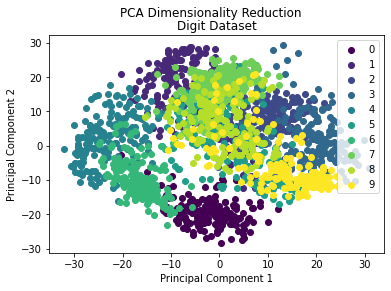

In [3]:
data = datasets.load_digits()
X = data.data
y = data.target

# reduce the dimension to 2 principal component
X_trans = PCA().pca(X, 2)
x1 = X_trans[:, 0]
x2 = X_trans[:, 1]

cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]
class_distr = []

for i, l in enumerate(np.unique(y)):
    _x1=x1[y==l]
    _x2=x2[y==l]
    _y=y[y==l]
    class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))

plt.legend(class_distr, y, loc=1)

plt.suptitle("PCA Dimensionality Reduction")
plt.title("Digit Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()